<a href="https://colab.research.google.com/github/swilsonmfc/pandas/blob/main/6_Lesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning

# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import mstats
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Data

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/allbp.names

--2021-06-23 13:06:38--  https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/allbp.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 866 [application/x-httpd-php]
Saving to: ‘allbp.names’

allbp.names         100%[===================>]     866  --.-KB/s    in 0s      

2021-06-23 13:06:38 (26.9 MB/s) - ‘allbp.names’ saved [866/866]



In [3]:
!cat allbp.names

;
; Thyroid disease records supplied by the Garavan Institute and J. Ross
; Quinlan, New South Wales Institute, Syndney, Australia.
;
; 1987.
;

increased binding protein, decreased binding protein,
negative.			|  classes

age:				continuous.
sex:				M, F.
on thyroxine:			f, t.
query on thyroxine:		f, t.
on antithyroid medication:	f, t.
sick:				f, t.
pregnant:			f, t.
thyroid surgery:		f, t.
I131 treatment:			f, t.
query hypothyroid:		f, t.
query hyperthyroid:		f, t.
lithium:			f, t.
goitre:				f, t.
tumor:				f, t.
hypopituitary:			f, t.
psych:				f, t.
TSH measured:			f, t.
TSH:				continuous.
T3 measured:			f, t.
T3:				continuous.
TT4 measured:			f, t.
TT4:				continuous.
T4U measured:			f, t.
T4U:				continuous.
FTI measured:			f, t.
FTI:				continuous.
TBG measured:			f, t.
TBG:				continuous.
referral source:		WEST, STMW, SVHC, SVI, SVHD, other.


In [4]:
names = [
'age',
'sex',
'on_thyroxine',
'query_on_thyroxine',
'on_antithyroid',
'sick',
'pregnant',
'thyroid_surgery',
'I131_treatment',
'query_hypothyroid',
'query_hyperthyroid',
'lithium',
'goitre',
'tumor',
'hypopituitary',
'psych',
'TSH_measured',
'TSH',
'T3_measured',
'T3',
'TT4_measured',
'TT4',
'T4U_measured',
'T4U',
'FTI_measured',
'FTI',
'TBG_measured',
'TBG',
'referral_source', 
'target'
]

In [5]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/thyroid-disease/allbp.data', names=names)

# Overview

In [6]:
# Small dataset
df.shape

(2800, 30)

In [7]:
# All strings
df.dtypes

age                   object
sex                   object
on_thyroxine          object
query_on_thyroxine    object
on_antithyroid        object
sick                  object
pregnant              object
thyroid_surgery       object
I131_treatment        object
query_hypothyroid     object
query_hyperthyroid    object
lithium               object
goitre                object
tumor                 object
hypopituitary         object
psych                 object
TSH_measured          object
TSH                   object
T3_measured           object
T3                    object
TT4_measured          object
TT4                   object
T4U_measured          object
T4U                   object
FTI_measured          object
FTI                   object
TBG_measured          object
TBG                   object
referral_source       object
target                object
dtype: object

In [8]:
df.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target
count,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800,2800
unique,94,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,264,2,65,2,218,2,139,2,210,1,1,5,2800
top,59,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,?,t,?,t,?,t,?,t,?,f,?,other,negative.|194
freq,75,1830,2470,2760,2766,2690,2759,2761,2752,2637,2627,2786,2775,2729,2799,2665,2516,284,2215,585,2616,184,2503,297,2505,295,2800,2800,1632,1


# Age
* Let's clean up the first column

In [9]:
# Age is coded as an object type
df.age.describe()

count     2800
unique      94
top         59
freq        75
Name: age, dtype: object

In [10]:
# There's a question mark used for unknown
df.age.unique()

array(['41', '23', '46', '70', '18', '59', '80', '66', '68', '84', '67',
       '71', '28', '65', '42', '63', '51', '81', '54', '55', '60', '25',
       '73', '34', '78', '37', '85', '26', '58', '64', '44', '48', '61',
       '35', '83', '21', '87', '53', '77', '27', '69', '74', '38', '76',
       '45', '36', '22', '43', '72', '82', '31', '39', '49', '62', '57',
       '1', '50', '30', '29', '75', '19', '7', '79', '17', '24', '15',
       '32', '47', '16', '52', '33', '13', '10', '89', '56', '20', '90',
       '40', '88', '14', '86', '94', '12', '4', '11', '8', '5', '455',
       '2', '91', '6', '?', '93', '92'], dtype=object)

In [11]:
# Can't cast to integer with a string in there
try:
  df.age.astype(int)
except Exception as e:
  print(e)

invalid literal for int() with base 10: '?'


In [12]:
# We can convert the ? to an unknown type
df['age'] = df.age.replace('?', np.NaN)
df.age.describe()

count     2799
unique      93
top         59
freq        75
Name: age, dtype: object

In [13]:
# Replace the ? with np.NaN
df['age'] = df.age.replace('?', np.NaN)
df.age.unique()

array(['41', '23', '46', '70', '18', '59', '80', '66', '68', '84', '67',
       '71', '28', '65', '42', '63', '51', '81', '54', '55', '60', '25',
       '73', '34', '78', '37', '85', '26', '58', '64', '44', '48', '61',
       '35', '83', '21', '87', '53', '77', '27', '69', '74', '38', '76',
       '45', '36', '22', '43', '72', '82', '31', '39', '49', '62', '57',
       '1', '50', '30', '29', '75', '19', '7', '79', '17', '24', '15',
       '32', '47', '16', '52', '33', '13', '10', '89', '56', '20', '90',
       '40', '88', '14', '86', '94', '12', '4', '11', '8', '5', '455',
       '2', '91', '6', nan, '93', '92'], dtype=object)

In [14]:
# Convert to float
df['age'] = df.age.astype('float')
df.age.unique()

array([ 41.,  23.,  46.,  70.,  18.,  59.,  80.,  66.,  68.,  84.,  67.,
        71.,  28.,  65.,  42.,  63.,  51.,  81.,  54.,  55.,  60.,  25.,
        73.,  34.,  78.,  37.,  85.,  26.,  58.,  64.,  44.,  48.,  61.,
        35.,  83.,  21.,  87.,  53.,  77.,  27.,  69.,  74.,  38.,  76.,
        45.,  36.,  22.,  43.,  72.,  82.,  31.,  39.,  49.,  62.,  57.,
         1.,  50.,  30.,  29.,  75.,  19.,   7.,  79.,  17.,  24.,  15.,
        32.,  47.,  16.,  52.,  33.,  13.,  10.,  89.,  56.,  20.,  90.,
        40.,  88.,  14.,  86.,  94.,  12.,   4.,  11.,   8.,   5., 455.,
         2.,  91.,   6.,  nan,  93.,  92.])

In [15]:
# Age is an integer
# Gotcha - Can't represent np.NaN for integers
# Convert to float, then to Int32, Int16
df['age'] = df.age.astype('Int32')
#df['age'] = df.age.astype(pd.Int32Dtype()) #Alternate
df.age.describe()

count    2799.00000
mean       51.84423
std        20.46116
min         1.00000
25%        36.00000
50%        54.00000
75%        67.00000
max       455.00000
Name: age, dtype: float64

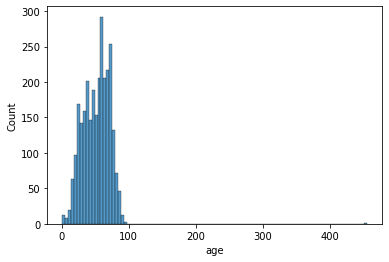

In [16]:
sns.histplot(df.age)

In [17]:
# Whoa - someone is 455 years old - Strategies?
#  Track down
#  Mark unknown
#  Winsor - cap - note df.age > 100 is ambiguous for NA
df['age'] = np.where((df.age > 100) & (pd.notnull(df.age)), 100, df.age)
df.age.sort_values()

763        1
115        1
2551       1
228        1
2724       1
        ... 
2418      93
1129      94
2673      94
1364     100
1985    <NA>
Name: age, Length: 2800, dtype: object

# Data Entry

## Question Marks

In [18]:
# Anything Missing?
df.isna().sum()

age                   1
sex                   0
on_thyroxine          0
query_on_thyroxine    0
on_antithyroid        0
sick                  0
pregnant              0
thyroid_surgery       0
I131_treatment        0
query_hypothyroid     0
query_hyperthyroid    0
lithium               0
goitre                0
tumor                 0
hypopituitary         0
psych                 0
TSH_measured          0
TSH                   0
T3_measured           0
T3                    0
TT4_measured          0
TT4                   0
T4U_measured          0
T4U                   0
FTI_measured          0
FTI                   0
TBG_measured          0
TBG                   0
referral_source       0
target                0
dtype: int64

In [19]:
# Convert ? to np.NaN
#   Caution df.replace('?', np.NaN) will throough FutureWarning
df = df.replace({'?' : np.NaN})

In [20]:
# Now check
df.isna().sum()

age                      1
sex                    110
on_thyroxine             0
query_on_thyroxine       0
on_antithyroid           0
sick                     0
pregnant                 0
thyroid_surgery          0
I131_treatment           0
query_hypothyroid        0
query_hyperthyroid       0
lithium                  0
goitre                   0
tumor                    0
hypopituitary            0
psych                    0
TSH_measured             0
TSH                    284
T3_measured              0
T3                     585
TT4_measured             0
TT4                    184
T4U_measured             0
T4U                    297
FTI_measured             0
FTI                    295
TBG_measured             0
TBG                   2800
referral_source          0
target                   0
dtype: int64

## Binary
* How are true / false columns being handled

In [21]:
df.TT4_measured.unique()

array(['t', 'f'], dtype=object)

In [22]:
# Convert from t, f to 1, 0
df = df.replace({'t': 1, 'f': 0})

In [23]:
df.TT4_measured.unique()

array([1, 0])

## Column Types

In [24]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid',
       'sick', 'pregnant', 'thyroid_surgery', 'I131_treatment',
       'query_hypothyroid', 'query_hyperthyroid', 'lithium', 'goitre', 'tumor',
       'hypopituitary', 'psych', 'TSH_measured', 'TSH', 'T3_measured', 'T3',
       'TT4_measured', 'TT4', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI',
       'TBG_measured', 'TBG', 'referral_source', 'target'],
      dtype='object')

In [25]:
COLUMNS_INT      = ['age']
COLUMNS_FLOAT    = ['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']
COLUMNS_CATEGORY = ['sex', 'referral_source']
COLUMNS_BINARY   = ['on_thyroxine', 
                    'query_on_thyroxine', 
                    'on_antithyroid',
                    'sick', 
                    'pregnant', 
                    'thyroid_surgery', 
                    'I131_treatment',
                    'query_hypothyroid', 
                    'query_hyperthyroid', 
                    'lithium', 
                    'goitre', 
                    'tumor',
                    'hypopituitary', 
                    'psych',
                    'TSH_measured', 
                    'T3_measured',
                    'TT4_measured', 
                    'T4U_measured', 
                    'FTI_measured', 
                    'TBG_measured']

In [26]:
for col in COLUMNS_INT:
  df[col] = df[col].astype('Int32')

In [27]:
for col in COLUMNS_FLOAT:
  df[col] = df[col].astype('float')

In [28]:
for col in COLUMNS_CATEGORY:
  df[col] = df[col].astype('category')

In [29]:
for col in COLUMNS_BINARY:
  df[col] = df[col].astype('Int32')

In [30]:
df.dtypes

age                      Int32
sex                   category
on_thyroxine             Int32
query_on_thyroxine       Int32
on_antithyroid           Int32
sick                     Int32
pregnant                 Int32
thyroid_surgery          Int32
I131_treatment           Int32
query_hypothyroid        Int32
query_hyperthyroid       Int32
lithium                  Int32
goitre                   Int32
tumor                    Int32
hypopituitary            Int32
psych                    Int32
TSH_measured             Int32
TSH                    float64
T3_measured              Int32
T3                     float64
TT4_measured             Int32
TT4                    float64
T4U_measured             Int32
T4U                    float64
FTI_measured             Int32
FTI                    float64
TBG_measured             Int32
TBG                    float64
referral_source       category
target                  object
dtype: object

## Duplicates

## Target

In [31]:
# All the target values are unique
len(df.target.unique())

2800

In [32]:
# But, they appear to be delimited
df.target.sort_values()

417     decreased binding protein.|1814
1021    decreased binding protein.|1947
2191     decreased binding protein.|206
2288    decreased binding protein.|2083
2431    decreased binding protein.|2123
                     ...               
298                       negative.|992
882                       negative.|993
202                       negative.|995
720                       negative.|997
380                       negative.|999
Name: target, Length: 2800, dtype: object

In [33]:
# Split #1 - returns an array
# Note the .str
df.target.str.split('.\|')

0       [negative, 3733]
1       [negative, 1442]
2       [negative, 2965]
3        [negative, 806]
4       [negative, 2807]
              ...       
2795    [negative, 3689]
2796    [negative, 3652]
2797    [negative, 1287]
2798    [negative, 3496]
2799     [negative, 724]
Name: target, Length: 2800, dtype: object

In [34]:
# Split #2, returns the target value as series
df.target.str.split('.\|', expand=True)

,0,1
0,negative,3733
1,negative,1442
2,negative,2965
3,negative,806
4,negative,2807
...,...,...
2795,negative,3689
2796,negative,3652
2797,negative,1287
2798,negative,3496


In [35]:
# Store the frame & check what's there
target_df = df.target.str.split('.\|', expand=True)
target_df[0].unique()

array(['negative', 'increased binding protein',
       'decreased binding protein'], dtype=object)

In [36]:
# The second part is a patient_id
target_df[1].head()

0    3733
1    1442
2    2965
3     806
4    2807
Name: 1, dtype: object

In [37]:
# Treatment Plan
#   Split
#   Rename columns
#   Assign correct dtypes
#   Concat back to df
target_df = df.target.str.split('.\|', expand=True)
target_df.columns = ['treatment', 'patient_id']
target_df['treatment']  = target_df.treatment.astype('category')
target_df['patient_id'] = pd.to_numeric(target_df.patient_id) # Different approach
df = pd.concat([df, target_df], axis=1)
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,treatment,patient_id
0,41,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.30,1,2.5,1,125.0,1,1.14,1,109.0,0,NaN,SVHC,negative.|3733,negative,3733
1,23,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4.10,1,2.0,1,102.0,0,NaN,0,NaN,0,NaN,other,negative.|1442,negative,1442
2,46,M,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.98,0,NaN,1,109.0,1,0.91,1,120.0,0,NaN,other,negative.|2965,negative,2965
3,70,F,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.16,1,1.9,1,175.0,0,NaN,0,NaN,0,NaN,other,negative.|806,negative,806
4,70,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.72,1,1.2,1,61.0,1,0.87,1,70.0,0,NaN,SVI,negative.|2807,negative,2807


# Missing

## Deletion
* First place to start
* List-wise - a column has a large proportion of missing data
* Row-wise - drop a row if any value is missing in the dataset
* Simple, but real data is often missing
* Perhaps okay when you have good "power" meaning:
  * A large enough sample
  * Assume it's missing at random

In [38]:
# Columns with large % missing might be good to remove
df.isna().sum() * 100. / len(df)

age                     0.035714
sex                     3.928571
on_thyroxine            0.000000
query_on_thyroxine      0.000000
on_antithyroid          0.000000
sick                    0.000000
pregnant                0.000000
thyroid_surgery         0.000000
I131_treatment          0.000000
query_hypothyroid       0.000000
query_hyperthyroid      0.000000
lithium                 0.000000
goitre                  0.000000
tumor                   0.000000
hypopituitary           0.000000
psych                   0.000000
TSH_measured            0.000000
TSH                    10.142857
T3_measured             0.000000
T3                     20.892857
TT4_measured            0.000000
TT4                     6.571429
T4U_measured            0.000000
T4U                    10.607143
FTI_measured            0.000000
FTI                    10.535714
TBG_measured            0.000000
TBG                   100.000000
referral_source         0.000000
target                  0.000000
treatment 

In [39]:
# How many cells have a null
np.count_nonzero(df.isnull())
# df.isna().sum().sum()

4556

In [40]:
# How many rows have a null
df.isnull().any(axis=1).sum()

2800

In [41]:
# Excluding TBG abouut 1/3 of our dataset has a null
columns = df.columns.tolist()
columns.remove('TBG')
df[columns].isnull().any(axis=1).sum()

853

In [42]:
# Find the record with missing date for later comparison
df[df.age.isna()]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,treatment,patient_id
1985,<NA>,F,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.6,1,1.5,1,120.0,1,0.82,1,146.0,0,NaN,other,negative.|1,negative,1


## Single Approach
* Generally fine for MCAR (Missing Completely at Random)
* Substitute a typical value for the missing value
  * Mean - Sensitive to outliers
  * Median - Robust to outliers
  * Categories - Use mode

In [43]:
# Copy and remove TBG
missing_df = df.copy()
missing_df = missing_df.drop(columns=['TBG'])

In [44]:
for col in missing_df.columns:
  if col in COLUMNS_INT:
    missing_df[col] = missing_df[col].fillna(missing_df[col].median())
  elif col in COLUMNS_FLOAT:
    missing_df[col] = missing_df[col].fillna(missing_df[col].mean())
  elif col in COLUMNS_CATEGORY:
    missing_df[col] = missing_df[col].fillna(missing_df[col].mode().iloc[0])
  elif col in COLUMNS_BINARY:
    missing_df[col] = missing_df[col].fillna(missing_df[col].mode())

In [45]:
missing_df.isna().sum()

age                   0
sex                   0
on_thyroxine          0
query_on_thyroxine    0
on_antithyroid        0
sick                  0
pregnant              0
thyroid_surgery       0
I131_treatment        0
query_hypothyroid     0
query_hyperthyroid    0
lithium               0
goitre                0
tumor                 0
hypopituitary         0
psych                 0
TSH_measured          0
TSH                   0
T3_measured           0
T3                    0
TT4_measured          0
TT4                   0
T4U_measured          0
T4U                   0
FTI_measured          0
FTI                   0
TBG_measured          0
referral_source       0
target                0
treatment             0
patient_id            0
dtype: int64

## Multiple Imputation
* Better for MAR (Missing at Random) & MNAR (Missing not at Random)
* Unlike missing completely at random, our missing point may be related to some of the observed data
* For example, in a survey, they answer a question depending on the value of another question
* Multiple Imputation
  * Incorporates other variables related to the missing value to impute
* Simple example:
  * A football player's salary is missing
  * In absense of anything perhaps league mean or median would be good.
  * But what if you know he's a quarterback or first round draft pick. 
  * Then you'd be better off looking at the mean or median of a subgroup 

In [46]:
# Copy and drop TBG
multi_df = df.copy()
multi_df = multi_df.drop(columns=['TBG', 'target'])

In [47]:
# Save column names
cols = multi_df.columns

# Convert All Categories to Numerics
for col in multi_df.select_dtypes('category').columns:
  multi_df[col] = multi_df[col].cat.codes

# Library can't handle all Pandas IntX types, convert to float
for col in multi_df.columns:
  if multi_df[col].dtype in ['Int8', 'Int32', 'Int64']:
    multi_df[col] = multi_df[col].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  # Remove the CWD from sys.path while we load stuff.


In [48]:
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(multi_df)
imputed = imp.transform(multi_df)
imputed_df = pd.DataFrame(imputed)
imputed_df.columns = cols
imputed_df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,treatment,patient_id
0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.30000,1.0,2.500000,1.0,125.0,1.0,1.140000,1.0,109.000000,0.0,1.0,2.0,3733.0
1,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.10000,1.0,2.000000,1.0,102.0,0.0,0.667307,0.0,144.476884,0.0,4.0,2.0,1442.0
2,46.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.98000,0.0,2.021911,1.0,109.0,1.0,0.910000,1.0,120.000000,0.0,4.0,2.0,2965.0
3,70.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.16000,1.0,1.900000,1.0,175.0,0.0,0.709239,0.0,211.611588,0.0,4.0,2.0,806.0
4,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.72000,1.0,1.200000,1.0,61.0,1.0,0.870000,1.0,70.000000,0.0,3.0,2.0,2807.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,70.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.70000,0.0,2.330345,1.0,155.0,1.0,1.050000,1.0,148.000000,0.0,3.0,2.0,3689.0
2796,73.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.15825,1.0,0.700000,1.0,63.0,1.0,0.880000,1.0,72.000000,0.0,4.0,2.0,3652.0
2797,75.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-9.65012,0.0,2.725409,1.0,147.0,1.0,0.800000,1.0,183.000000,0.0,4.0,2.0,1287.0
2798,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.40000,0.0,1.680101,1.0,100.0,1.0,0.830000,1.0,121.000000,0.0,4.0,2.0,3496.0


In [49]:
imputed_df.isna().sum()

age                   0
sex                   0
on_thyroxine          0
query_on_thyroxine    0
on_antithyroid        0
sick                  0
pregnant              0
thyroid_surgery       0
I131_treatment        0
query_hypothyroid     0
query_hyperthyroid    0
lithium               0
goitre                0
tumor                 0
hypopituitary         0
psych                 0
TSH_measured          0
TSH                   0
T3_measured           0
T3                    0
TT4_measured          0
TT4                   0
T4U_measured          0
T4U                   0
FTI_measured          0
FTI                   0
TBG_measured          0
referral_source       0
treatment             0
patient_id            0
dtype: int64

## Compare
* Quick look at differences in age between:
  * Single - Use median
  * Multi

In [50]:
# Original
df.age.iloc[1985]

<NA>

In [51]:
# Single
missing_df.age.iloc[1985]

54

In [52]:
# Multi
imputed_df.age.iloc[1985]

67.81433516981784

# Outliers
* Age, treated early had a visible outlier
* How can we detect

In [53]:
# Use a copy of our imputed dataset
outlier_df = imputed_df.copy()

## Visual
* Box plots are helpful for viewing outliers

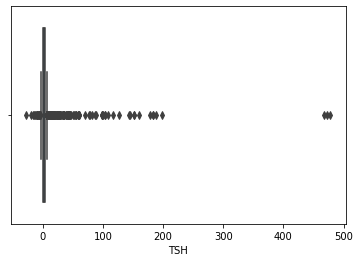

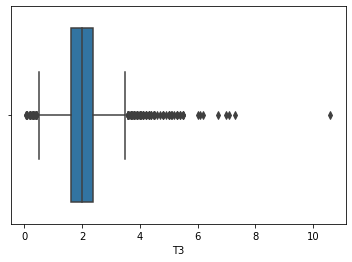

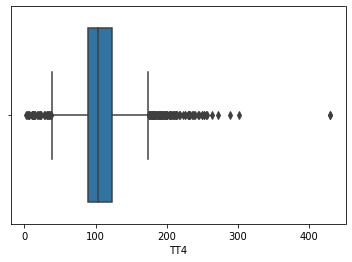

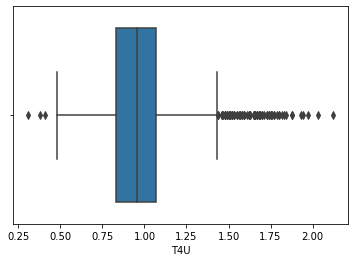

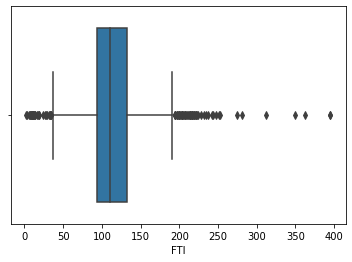

In [54]:
for col in COLUMNS_FLOAT:
  if col in outlier_df.columns:
    sns.boxplot(x=outlier_df[col])
    plt.show();

## Z-Score
* Where does the value fall on a normal curve
* How many standard deviations away?
* Is your data normal?
  * If it's not, you could apply transformations to it
  * Square, Square Root, Log
* Shoould you keep or remove?

In [55]:
for col in COLUMNS_FLOAT:
  if col in outlier_df.columns:
    outlier_df[f'{col}_z'] = np.abs(stats.zscore(outlier_df[col]))
    print(f"{col}\n{outlier_df[f'{col}_z'].sort_values()[-5:]}")

TSH
659      8.988887
639      9.528048
2772    22.712991
2507    22.909050
1165    23.203137
Name: TSH_z, dtype: float64
T3
783      6.105532
1757     6.498767
2613     6.629846
743      6.892002
1671    11.217588
Name: T3_z, dtype: float64
TT4
604     4.767988
2366    5.264001
2671    5.614128
743     9.377992
1415    9.377992
Name: TT4_z, dtype: float64
T4U
300     4.642598
1926    4.690694
530     4.834983
740     5.123561
1961    5.556428
Name: T4U_z, dtype: float64
FTI
542     5.991180
1671    7.111021
456     7.504479
1415    8.503256
743     8.503256
Name: FTI_z, dtype: float64


## Filtering
* Depending on our domain knowledge we could choose to filter observations that have an outlier 
* A common cutoff for normal data is 3 standard deviations, but you should consider how "normal" your data is

In [56]:
outlier_df[(outlier_df.TSH_z < 3) &
           (outlier_df.T3_z  < 3) &
           (outlier_df.TT4_z < 3) & 
           (outlier_df.T4U_z < 3) &
           (outlier_df.FTI_z < 3)]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,referral_source,treatment,patient_id,TSH_z,T3_z,TT4_z,T4U_z,FTI_z
0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.30000,1.0,2.500000,1.0,125.0,1.0,1.140000,1.0,109.000000,0.0,1.0,2.0,3733.0,0.162149,0.600241,0.478933,0.842989,0.152814
1,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.10000,1.0,2.000000,1.0,102.0,0.0,0.667307,0.0,144.476884,0.0,4.0,2.0,1442.0,0.024908,0.055150,0.192143,1.430491,0.920928
2,46.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.98000,0.0,2.021911,1.0,109.0,1.0,0.910000,1.0,120.000000,0.0,4.0,2.0,2965.0,0.177834,0.026430,0.012097,0.263227,0.180111
3,70.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.16000,1.0,1.900000,1.0,175.0,0.0,0.709239,0.0,211.611588,0.0,4.0,2.0,806.0,0.218026,0.186229,1.937795,1.228812,2.952826
4,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.72000,1.0,1.200000,1.0,61.0,1.0,0.870000,1.0,70.000000,0.0,3.0,2.0,2807.0,0.190578,1.103777,1.388410,0.455612,1.333188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,70.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.70000,0.0,2.330345,1.0,155.0,1.0,1.050000,1.0,148.000000,0.0,3.0,2.0,3689.0,0.093529,0.377861,1.354250,0.410122,1.027559
2796,73.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.15825,1.0,0.700000,1.0,63.0,1.0,0.880000,1.0,72.000000,0.0,4.0,2.0,3652.0,0.272035,1.759169,1.330056,0.407516,1.272656
2797,75.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-9.65012,0.0,2.725409,1.0,147.0,1.0,0.800000,1.0,183.000000,0.0,4.0,2.0,1287.0,0.698866,0.895703,1.120833,0.792286,2.086868
2798,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.40000,0.0,1.680101,1.0,100.0,1.0,0.830000,1.0,121.000000,0.0,4.0,2.0,3496.0,0.157248,0.474468,0.250498,0.647997,0.210377


## Winsor
* This caps data that is far from typical
* For example, if the Z Score was > 3, cap it to 3
* If the data was > 3 std deviations, cap it to 3 std

In [57]:
for col in COLUMNS_FLOAT:
  if col in outlier_df.columns:
    outlier_df[f'{col}_winsor'] = mstats.winsorize(outlier_df[col], limits=[0.05, 0.05]).tolist()

In [58]:
outlier_df[['TSH', 'TSH_z', 'TSH_winsor']].sort_values('TSH')

,TSH,TSH_z,TSH_winsor
1188,-28.057579,1.601101,0.02
2706,-19.585199,1.185830,0.02
2770,-16.403007,1.029856,0.02
1975,-14.530780,0.938090,0.02
2261,-12.995700,0.862848,0.02
...,...,...,...
659,188.000000,8.988887,12.00
639,199.000000,9.528048,12.00
2772,468.000000,22.712991,12.00
2507,472.000000,22.909050,12.00


# Notes
* Best Practice: Keep the data before you changed and after
* Mark columns "Dirty" if you impute or transform
* Should you handle outliers before missing data?